In [5]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from CommonCnn import FaceKeypointModel
from tqdm import tqdm

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

resize = 224

In [1]:
import config
import torch
import importlib
import cv2
import numpy as np
import matplotlib.pyplot as plt


/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
sort_val_loss = [[0.1,"paosfd"],[0.01,"asfdjl"],[0.5,"asdfasd"],[1,"234q23"],[0.001,"aweraw"]]

# 第1要素（インデックスは0）でソート
sorted_list = sorted(sort_val_loss, key=lambda x: x[0])

# 出力
for item in sorted_list:
    print(item)


[0.001, 'aweraw']
[0.01, 'asfdjl']
[0.1, 'paosfd']
[0.5, 'asdfasd']
[1, '234q23']


In [2]:
# モデルの定義
MODEL_FILE = "./CommonCnn.py"
model_name = str(MODEL_FILE).replace("./", "").replace(".py", "")
module = importlib.import_module(model_name)
# モジュール内のクラスを取得
FaceKeypointModel = getattr(module, "FaceKeypointModel")
model = FaceKeypointModel().to(config.DEVICE)

image_list = ['7590860.jpg','7590880.jpg','7591360.jpg','8170661.jpg','8880920.jpg','8880980.jpg','8881390.jpg','8881470.jpg','8881570.jpg']

tensor([[ 51.5746, 127.3351,  57.5061, 145.7013,  65.8959, 160.9785,  81.0575,
         171.0456,  99.4307, 178.5688, 118.8018, 169.3998, 134.1450, 157.1132,
         143.2764, 140.1105, 148.0231, 120.0755]], device='cuda:0')


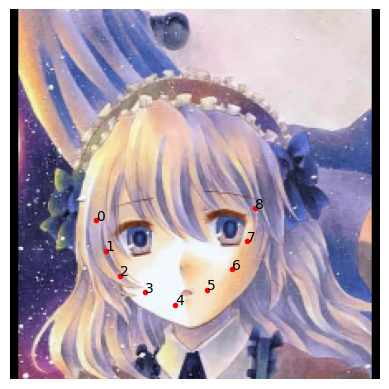

tensor([[ 50.4515, 125.1697,  56.3215, 143.2804,  64.5880, 158.2013,  79.5022,
         168.1134,  97.6073, 175.5234, 116.6524, 166.4492, 131.7132, 154.3648,
         140.7263, 137.6205, 145.4417, 117.9185]], device='cuda:0')


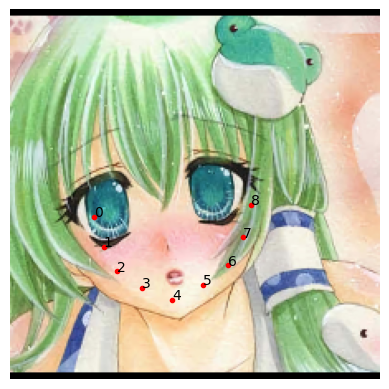

tensor([[ 55.1926, 129.5246,  60.5749, 147.5634,  68.9954, 164.1700,  84.2911,
         174.3836, 102.6215, 181.8453, 122.3329, 172.9731, 138.1952, 160.6357,
         147.0013, 143.6753, 151.5195, 123.3950]], device='cuda:0')


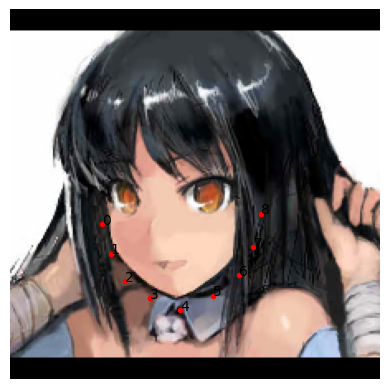

tensor([[ 62.6897, 143.4486,  68.3036, 163.0546,  77.5846, 182.0706,  94.3985,
         193.3561, 114.4666, 201.5168, 136.2933, 191.9336, 154.0544, 178.3912,
         163.5313, 159.8162, 168.3768, 137.3745]], device='cuda:0')


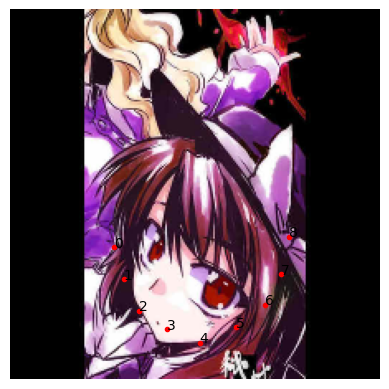

tensor([[ 54.2035, 131.1175,  60.0472, 149.7844,  68.6480, 165.9465,  84.2020,
         176.3239, 102.9943, 183.9781, 122.9343, 174.7065, 138.8432, 162.1171,
         148.0540, 144.7556, 152.8294, 124.1664]], device='cuda:0')


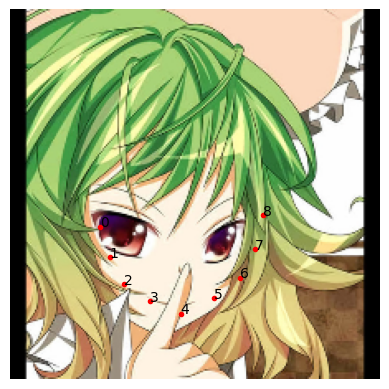

tensor([[ 54.6471, 127.4340,  59.8766, 145.1026,  68.1577, 161.5699,  83.1528,
         171.6207, 101.1432, 178.9470, 120.5175, 170.2648, 136.1984, 158.1583,
         144.7866, 141.5232, 149.2209, 121.5601]], device='cuda:0')


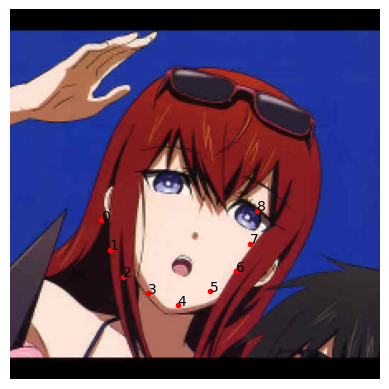

tensor([[ 60.0361, 139.5686,  65.7129, 158.8465,  74.7840, 176.9959,  91.2136,
         187.9904, 110.8650, 195.9902, 132.1108, 186.5124, 149.2861, 173.2663,
         158.6673, 155.0691, 163.4869, 133.2182]], device='cuda:0')


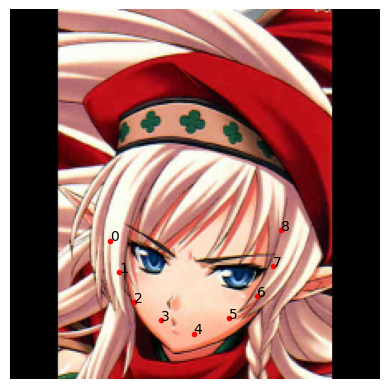

tensor([[ 58.6929, 137.5051,  64.3830, 156.6049,  73.3282, 174.3062,  89.5562,
         185.1589, 109.0011, 193.0576, 129.9264, 183.6591, 146.7943, 170.5694,
         156.1074, 152.5595, 160.9062, 131.0446]], device='cuda:0')


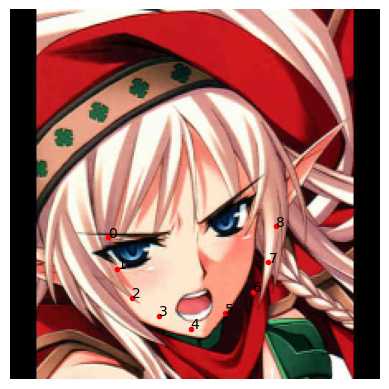

tensor([[ 59.0471, 138.0051,  64.7204, 157.1333,  73.7052, 174.9593,  89.9748,
         185.8298, 109.4501, 193.7654, 130.4694, 184.3428, 147.4090, 171.2308,
         156.7366, 153.1802, 161.5417, 131.5720]], device='cuda:0')


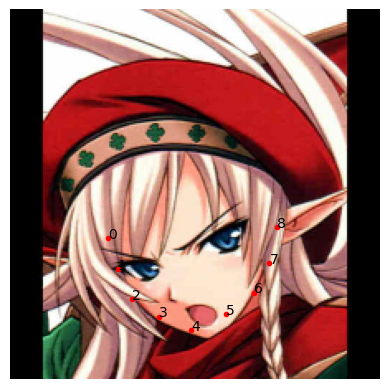

In [7]:
def model_test(model,model_path,dataset_path,image_list,save_image_dir):
    checkpoint = torch.load(model_path)
    model.load_state_dict(checkpoint['model_state_dict'])
    model.eval()
    for image_name in image_list:
        with torch.no_grad():
            image = cv2.imread(f"{dataset_path}/{image_name}")
            image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (config.RESIZE, config.RESIZE))
            orig_image = image.copy()
            image = image / 255.0
            image = np.transpose(image, (2, 0, 1))
            image = torch.tensor(image, dtype=torch.float)
            image = image.unsqueeze(0).to(config.DEVICE)
            outputs = model(image)
            print(outputs)
            outputs = outputs.cpu().detach().numpy()
            outputs = outputs.reshape(-1, 2)
            # plt.subplot(3, 4, i+1)
            plt.imshow(orig_image, cmap='gray')
            for p in range(outputs.shape[0]):
                    plt.plot(outputs[p, 0], outputs[p, 1], 'r.')
                    plt.text(outputs[p, 0], outputs[p, 1], f"{p}")
            plt.axis('off')
            plt.savefig(f"{save_image_dir}/valid_{image_name}.jpg")
            plt.show()
            plt.close()
model_path = "/root/source/result/202306091311_CommonCnn/model0_50.pth"
            
model_test(model,model_path,f"{config.DATASET_PATH}/images",image_list,"/root/source/save_img")
        

(512, 512, 3)
tensor([[-0.0155,  0.0239, -0.0786, -0.0731, -0.0048,  0.0711, -0.0738, -0.0051,
          0.0845, -0.0163, -0.0123,  0.0779, -0.0248,  0.0068, -0.1262, -0.0148,
          0.0012,  0.0374]], device='cuda:0')


TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

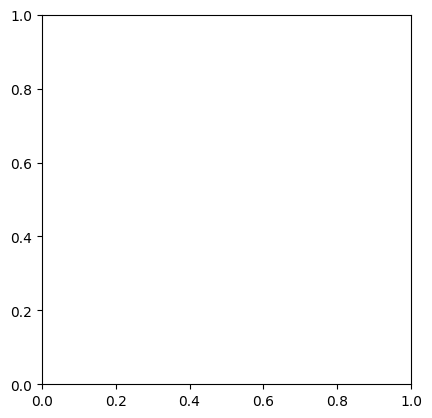

In [12]:
import os

file_names = os.listdir("/root/dataset/Annotated_High-Resolution_Anime/images/")
images_list, outputs_list = [], []
# for i in range(9):

i=100

for num in range(i,i+12):
    with torch.no_grad():
        # image = images[i]
        image = cv2.imread(f"/root/dataset/Annotated_High-Resolution_Anime/images/{file_names[num]}")
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        
        print(image.shape)
        # image = image.reshape(256, 256, 3)
        image = cv2.resize(image, (224, 224))
        # image = image.reshape(256, 256, 3)
        orig_image = image.copy()
        image = image / 255.0
        image = np.transpose(image, (2, 0, 1))
        image = torch.tensor(image, dtype=torch.float)
        image = image.unsqueeze(0).to(config.DEVICE)
        
        # forward pass through the model
        outputs = model(image)
        
# test_keypoints_plot(images_list, outputs_list)

In [6]:
# model = FaceKeypointModel().to(DEVICE)
# load the model checkpoint
# checkpoint = torch.load(f"/root/source/anime_face_contours_detector/test_202306061733_CommonCnn/model.pth")
model_path = "/root/source/result/202306091311_CommonCnn/model0_50.pth"
checkpoint = torch.load(model_path)
# load model weights state_dict
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

FaceKeypointModel(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=128, out_features=18, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout2d(p=0.2, inplace=False)
)

In [12]:
def test_keypoints_plot(images_list, outputs_list):
    """
    This function plots the keypoints for the outputs and images
    in the `test.py` script which used the `test.csv` file.
    """
    plt.figure(figsize=(10, 10))
    for i in range(len(images_list)):
        outputs = outputs_list[i]
        image = images_list[i]
        outputs = outputs.cpu().detach().numpy()
        outputs = outputs.reshape(-1, 2)
        plt.subplot(3, 4, i+1)
        plt.imshow(image, cmap='gray')
        for p in range(outputs.shape[0]):
                plt.plot(outputs[p, 0], outputs[p, 1], 'r.')
                plt.text(outputs[p, 0], outputs[p, 1], f"{p}")
        plt.axis('off')
    plt.savefig(f"./test.jpg")
    # plt.show()
    plt.close()